<a href="https://colab.research.google.com/github/Adrilopes/python-statistics-lab/blob/main/05_dispersion_measures_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sobre o notebook**

Aproveite esse espaço para as atividades do curso de **Estatística com Python: resumindo e analisando dados** da Alura. Aqui você pode escrever e testar os códigos dos diversos exercícios do **Mão na Massa** envolvendo os aprendizados de cada aula.

Utilizando os conhecimentos adquiridos ao longo do curso, você precisará realizar uma **análise descritiva** básica de um conjunto de dados retirados da **Pesquisa Nacional por Amostra de Domicílios - 2015** do IBGE.

Nele, você irá avaliar os tipos dos dados e suas distribuições, calcular as medidas de tendência central, medidas separatrizes e de dispersão dos dados e construirá visuais como histogramas, boxplot, entre outras para responder às perguntas.

Este notebook foi construído com espaços para adicionar as células dos desafios propostos no curso, com eles você tem espaço para construir e executar suas soluções.





## **Dataset do Projeto**

O conjunto de dados que será explorado aqui é uma adaptação dos dados da **Pesquisa Nacional por Amostra de Domicílios - PNAD**. Ela investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas.

O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### **Fonte dos Dados**

https://www.ibge.gov.br/estatisticas/sociais/populacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?edicao=9128

### **Variáveis do dataset**

> ### UF
> ***

Unidade federativa da pessoa responsável

> ### Sexo
> ***

Sexo biológico da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Idade
> ***

Idade da pessoa responsável na data de referência em anos.

> ### Cor
> ***

Cor ou raça da pessoa responsável com base na autodeclaração

<br>

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|

> ### Anos de Estudo
> ***

Anos de estudo da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|

> ### Renda
> ***

Rendimento mensal do trabalho principal da pessoa responsável para 10 anos ou mais de idade.

> ### Altura (elaboração própria - dado sintético)
> ***

Altura da pessoa responsável em metros.

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a **Renda** era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a **Renda** era missing;
> 3. Foram considerados somente os registros das **Pessoas de Referência** de cada domicílio (responsável pelo domicílio).

## **Aula 01 - Entendendo os dados**

### **Mão na Massa - Explorando novos dados**




Você está treinando para ser uma pessoa cientista de dados e recebeu a demanda de investigar os dados da PNAD de 2015. A fim de testar as suas habilidades de análise de dados e os conceitos da estatística descritiva, responda às perguntas ao longo do notebook compartilhado.

#### **Importando os pacotes e configurando o ambiente**

In [264]:
# Importando os pacotes do projeto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### **Importe o dataset e armazene o conteúdo em um DataFrame**

**Dica:** Passe a url para a função que lê um arquivo do tipo `.csv`

In [265]:
url = "https://raw.githubusercontent.com/alura-cursos/Estatisticas-Python-frequencias-medidas/refs/heads/main/dados/dados_desafio.csv"
dados = pd.read_csv(url)
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
0,Rondônia,0,23,8,12,800,1.60
1,Rondônia,1,23,2,12,1150,1.74
2,Rondônia,1,35,8,15,880,1.76
3,Rondônia,0,46,2,6,3500,1.78
4,Rondônia,1,47,8,9,150,1.69


#### **Visualize o conteúdo do DataFrame e leia as infos sobre os dados (linhas, colunas, tipos)**

**Dica:** Para observar as infos dos dados, utilize a função `info`

In [266]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  object 
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos.de.Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.1+ MB


#### **Explore brevemente a variável `UF` e investigue quantos dados possuímos para cada estado**

**Dica:** Para explorar, utilize as funções `unique`, `value_counts`, `reset_index` e `barplot`



In [267]:
dados['UF'].unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

In [268]:
estados = dados['UF'].value_counts().reset_index()
estados

,UF,count
0,São Paulo,8544
1,Minas Gerais,7686
2,Rio Grande do Sul,6322
3,Bahia,5717
4,Rio de Janeiro,5556
5,Pará,4449
6,Paraná,4356
7,Pernambuco,3820
8,Goiás,3478
9,Ceará,3359


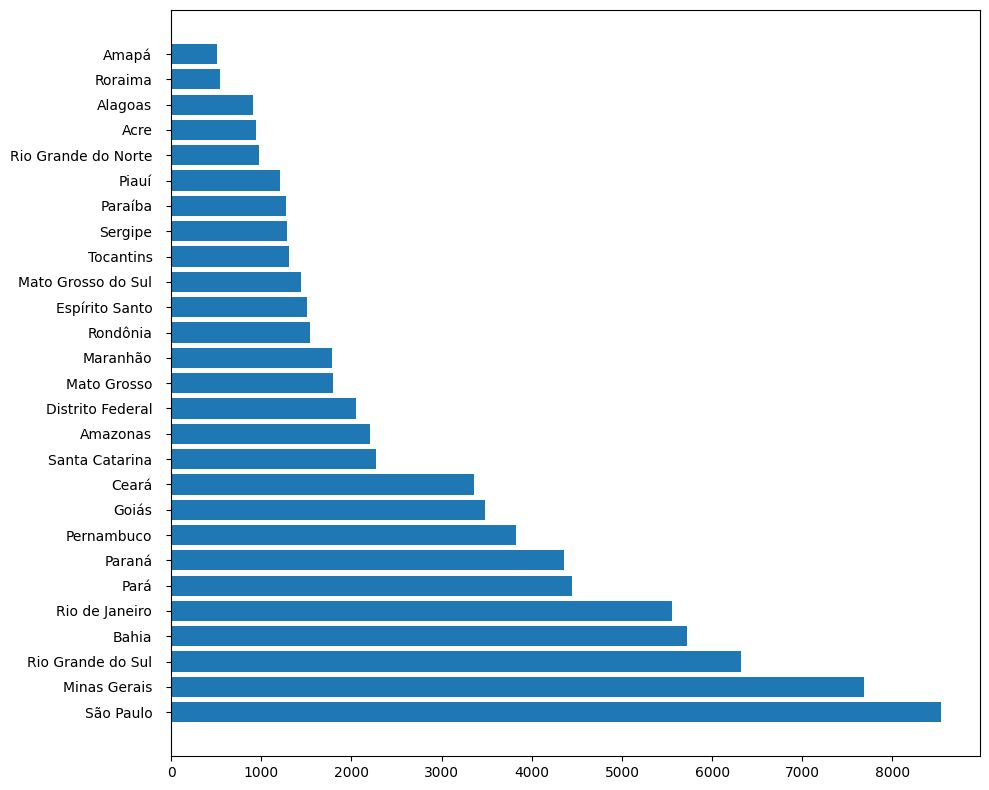

In [269]:
plt.figure(figsize=(10,8))

plt.barh(estados['UF'], estados['count'])

plt.gca().tick_params(axis='y', pad=10)  # espaço entre UF e barras

plt.tight_layout()
plt.show()

#### **Transforme as variáveis `Sexo`, `Cor` e `Anos.de.Estudo` em Categorical e observe o resultado**

**Dica 1:** Para te auxiliar neste processo, a célula abaixo traz os vetores com os valores de cada coluna na ordem desejada.

**Dica 2:** Utilize a tabela no início do documento para fazer a relação dos valores atuais para os desejados.

In [270]:
# Definindo as variáveis
sexo = {0: 'Masculino', 1: 'Feminino'}

cor = {0:'Indígena', 2:'Branca', 4:'Preta', 6:'Amarela', 8:'Parda'}

anos_de_estudo = {1:'Sem instrução e menos de 1 ano', 2:'1 ano', 3:'2 anos', 4:'3 anos', 5:'4 anos', 6:'5 anos',
    7:'6 anos', 8:'7 anos', 9:'8 anos', 10:'9 anos', 11:'10 anos', 12:'11 anos', 13:'12 anos',14:'13 anos',
    15:'14 anos', 16:'15 anos ou mais', 17:'Não determinados'
}

##### Sexo

In [271]:
dados['Categ.Sexo'] = pd.Categorical(
    dados['Sexo'],
    categories=[0,1],
    ordered=True
  )

In [272]:
dados['Cat.Sexo']  = dados['Categ.Sexo'].map(sexo)
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Categ.Sexo,Cat.Sexo
0,Rondônia,0,23,8,12,800,1.60,0,Masculino
1,Rondônia,1,23,2,12,1150,1.74,1,Feminino
2,Rondônia,1,35,8,15,880,1.76,1,Feminino
3,Rondônia,0,46,2,6,3500,1.78,0,Masculino
4,Rondônia,1,47,8,9,150,1.69,1,Feminino


In [273]:
# Selecionando valores distintos e ordenando por 'Cat.Sexo'
dados_distintos = dados[['Sexo', 'Categ.Sexo']].drop_duplicates()
dados_distintos

,Sexo,Categ.Sexo
0,0,0
1,1,1


##### Cor

In [274]:
dados['Categ.Cor'] = pd.Categorical(
    dados['Cor'],
    categories=[0,2,4,6,8],
    ordered=True
  )

In [275]:
dados['Categ.Cor']  = dados['Categ.Cor'].map(cor)
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Categ.Sexo,Cat.Sexo,Categ.Cor
0,Rondônia,0,23,8,12,800,1.60,0,Masculino,Parda
1,Rondônia,1,23,2,12,1150,1.74,1,Feminino,Branca
2,Rondônia,1,35,8,15,880,1.76,1,Feminino,Parda
3,Rondônia,0,46,2,6,3500,1.78,0,Masculino,Branca
4,Rondônia,1,47,8,9,150,1.69,1,Feminino,Parda


In [276]:
dados_distintos = dados[['Cor', 'Categ.Cor']].drop_duplicates()
dados_distintos

,Cor,Categ.Cor
0,8,Parda
1,2,Branca
8,4,Preta
35,6,Amarela
659,0,Indígena


##### Anos de Estudo

In [277]:
dados['Categ.Anos.Estudo'] = pd.Categorical(
    dados['Anos.de.Estudo'],
    categories=range(1, 18),
    ordered=True
)

In [278]:
dados['Categ.Anos.Estudo']  = dados['Categ.Anos.Estudo'].map(anos_de_estudo)
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Categ.Sexo,Cat.Sexo,Categ.Cor,Categ.Anos.Estudo
0,Rondônia,0,23,8,12,800,1.60,0,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,1,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,1,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,0,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,1,Feminino,Parda,8 anos


In [279]:
dados_distintos = dados[['Anos.de.Estudo', 'Categ.Anos.Estudo']].drop_duplicates().sort_values(by='Categ.Anos.Estudo')
dados_distintos

,Anos.de.Estudo,Categ.Anos.Estudo
20,1,Sem instrução e menos de 1 ano
43,2,1 ano
37,3,2 anos
49,4,3 anos
22,5,4 anos
3,6,5 anos
36,7,6 anos
50,8,7 anos
4,9,8 anos
16,10,9 anos


#### **Apresente em texto a menor e maior `Renda` da base de dados**

**Dica:** A renda é uma medida discreta. Utilizamos f-strings para formatar a string de forma mais legível e eficiente, substituindo diretamente as variáveis dentro da string

In [280]:
dados['Renda'].unique()

array([  800,  1150,   880, ..., 36000,  1329,  5260])

In [281]:
print(f'A menor renda é R$ {min(dados["Renda"])} enquanto a maior renda é R$ {max(dados["Renda"])}')

A menor renda é R$ 0 enquanto a maior renda é R$ 200000


In [282]:
dados.sort_values(by='Renda')

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Categ.Sexo,Cat.Sexo,Categ.Cor,Categ.Anos.Estudo
59331,Paraná,0,76,2,1,0,1.73,0,Masculino,Branca,Sem instrução e menos de 1 ano
25885,Sergipe,0,79,4,2,0,1.64,0,Masculino,Preta,1 ano
25884,Sergipe,1,59,8,1,0,1.64,1,Feminino,Parda,Sem instrução e menos de 1 ano
25879,Sergipe,0,65,4,1,0,1.78,0,Masculino,Preta,Sem instrução e menos de 1 ano
25875,Sergipe,0,68,8,1,0,1.72,0,Masculino,Parda,Sem instrução e menos de 1 ano
...,...,...,...,...,...,...,...,...,...,...,...
37612,Minas Gerais,0,61,2,16,100000,1.58,0,Masculino,Branca,15 anos ou mais
43694,Rio de Janeiro,1,53,0,13,120000,1.66,1,Feminino,Indígena,12 anos
56141,Paraná,0,42,2,16,200000,1.58,0,Masculino,Branca,15 anos ou mais
28110,Bahia,0,51,2,12,200000,1.59,0,Masculino,Branca,11 anos


## **Aula 02 - Identificando o perfil do público**

### **Mão na Massa - Analisando o perfil das pessoas responsáveis**

Vamos prosseguir no treinamento, agora identificando o perfil das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015. Responda às perguntas abaixo e reflita sobre os achados.

#### **Construa uma tabela de frequências das pessoas responsáveis pelo domicílio por `Cat.Sexo`. Adicione também uma coluna com esse valor em porcentagem.**

In [283]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Categ.Sexo,Cat.Sexo,Categ.Cor,Categ.Anos.Estudo
0,Rondônia,0,23,8,12,800,1.60,0,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,1,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,1,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,0,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,1,Feminino,Parda,8 anos


In [284]:
f_sexo = (
    dados
    .groupby('Cat.Sexo')
    .size()
    .reset_index(name='Fi')
)

f_sexo

/tmp/ipython-input-981702093.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Cat.Sexo')


,Cat.Sexo,Fi
0,Masculino,53250
1,Feminino,23590


In [285]:
#calcular frequencia relativa
f_sexo['Fr'] = round(f_sexo['Fi'] / f_sexo['Fi'].sum() * 100, 1)

f_sexo

,Cat.Sexo,Fi,Fr
0,Masculino,53250,69.3
1,Feminino,23590,30.7


In [286]:
#renomeando colunas:
f_sexo.columns = ['Sexo', 'Quantidade', 'Porcentagem(%)']
f_sexo

,Sexo,Quantidade,Porcentagem(%)
0,Masculino,53250,69.3
1,Feminino,23590,30.7


#### **Construa uma tabela de frequências absolutas e outra de relativas cruzando as variáveis `Cat.Sexo` e `Cat.Cor` das pessoas responsáveis pelo domicílio.**

In [287]:
f_sexo_cor = pd.crosstab(dados['Cat.Sexo'], dados['Categ.Cor'])

f_sexo_cor

Categ.Cor,Indígena,Branca,Preta,Amarela,Parda
Cat.Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [288]:
f_sexo_cor_rel = round(pd.crosstab(dados['Cat.Sexo'], dados['Categ.Cor'], normalize='all') * 100, 2)

f_sexo_cor_rel

Categ.Cor,Indígena,Branca,Preta,Amarela,Parda
Cat.Sexo,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Feminino,0.13,12.52,3.76,0.15,14.14


> #### Conclusões

Escreva suas conclusões aqui...

Podemos perceber que pessoas do sexo masculino no total são mais responsaveis pelos domicilios, e os de cor Parda e branca lideram o rank. Enquanto do sexo feminino detem o valor menor, sendo indigenas e cor amarela com menor valor.

#### **Construa uma tabela cruzada para calcular a `Renda` média das pessoas responsáveis pelo domicílio em relação ao `Cat.Sexo` e `Cat.Cor`.**

In [289]:
#ticket médio
renda_sexo_cor = round(pd.crosstab(dados['Cat.Sexo'], dados['Categ.Cor'], values=dados['Renda'], aggfunc='mean'), 2)

renda_sexo_cor

Categ.Cor,Indígena,Branca,Preta,Amarela,Parda
Cat.Sexo,,,,,
Masculino,1081.71,2925.74,1603.86,4758.25,1659.58
Feminino,2464.39,2109.87,1134.60,3027.34,1176.76


> #### Conclusões

Escreva suas conclusões aqui...

Observa-se que a renda média varia significativamente entre os grupos. Entre os homens, a maior média de renda está na categoria Amarela, enquanto entre as mulheres também se destaca a categoria Amarela, porém com valores inferiores aos masculinos. De forma geral, verifica-se que, dentro da mesma categoria de cor, os homens apresentam renda média superior às mulheres.


## **Aula 03 - Analisando a tendência dos dados**

### **Mão na Massa - Analisando a renda das pessoas responsáveis**

Nesta etapa do treinamento, vamos analisar mais dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, focando na renda e na variável que criamos com as suas alturas. Responda às perguntas abaixo e reflita sobre os achados.

#### **Calcule as medidas de tendência central (média, mediana e moda) para a variável `Renda`**

In [290]:
resumo_renda = {
    'media': dados['Renda'].mean(),
    'mediana': dados['Renda'].median(),
    'moda': dados['Renda'].mode()[0]
}
resumo_renda

{'media': np.float64(2000.3831988547631),
 'mediana': 1200.0,
 'moda': np.int64(788)}

#### **Crie um gráfico de barras do Top 5 estados pela médias de `Renda`**

**Dica:** Para conseguir apresentar apenas os Top 5 estados utilize a função `head()` passando como variável quantos valores deseja apresentar.

In [291]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Categ.Sexo,Cat.Sexo,Categ.Cor,Categ.Anos.Estudo
0,Rondônia,0,23,8,12,800,1.60,0,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,1,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,1,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,0,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,1,Feminino,Parda,8 anos


In [292]:
top_5_estados = round(dados.groupby('UF')['Renda'].mean().sort_values(ascending=False).head(5),2)

top_5_estados= top_5_estados.reset_index()
top_5_estados.columns = ['UF', 'media']

top_5_estados

,UF,media
0,Distrito Federal,4241.95
1,São Paulo,2638.10
2,Rio de Janeiro,2496.40
3,Paraná,2493.87
4,Santa Catarina,2470.85


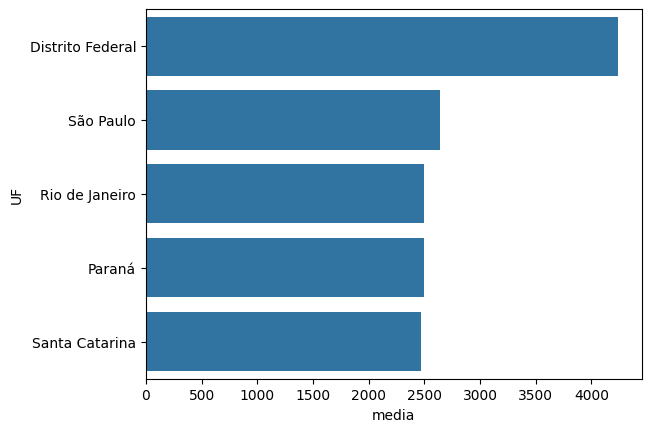

In [293]:
sns.barplot(data=top_5_estados, x='media', y='UF')
plt.show()

> #### Conclusões

Entre os cinco estados com maior média de renda, o Distrito Federal se destaca significativamente, apresentando valor muito superior aos demais. Já São Paulo, Rio de Janeiro, Paraná e Santa Catarina possuem médias relativamente próximas entre si, indicando um padrão mais homogêneo entre esses estados.

#### **Construa 3 tabelas cruzadas calculando a média, mediana e valores máximos de `Renda` relacionando as pessoas responsáveis por estado da Região Sudeste (`UF`) e por `Cat.Sexo`**

In [294]:
df_sudeste = dados[dados['UF'].isin(["Espírito Santo", "Minas Gerais", "Rio de Janeiro", "São Paulo"])]
df_sudeste

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Categ.Sexo,Cat.Sexo,Categ.Cor,Categ.Anos.Estudo
31818,Minas Gerais,0,40,2,12,1600,1.62,0,Masculino,Branca,11 anos
31819,Minas Gerais,0,58,8,5,850,1.58,0,Masculino,Parda,4 anos
31820,Minas Gerais,0,36,8,3,1400,1.75,0,Masculino,Parda,2 anos
31821,Minas Gerais,0,21,8,11,1500,1.66,0,Masculino,Parda,10 anos
31822,Minas Gerais,0,28,2,9,1600,1.62,0,Masculino,Branca,8 anos
...,...,...,...,...,...,...,...,...,...,...,...
55110,São Paulo,0,52,8,12,1500,1.82,0,Masculino,Parda,11 anos
55111,São Paulo,0,30,8,12,1500,1.48,0,Masculino,Parda,11 anos
55112,São Paulo,0,43,8,5,1100,1.72,0,Masculino,Parda,4 anos
55113,São Paulo,1,51,8,16,1600,1.75,1,Feminino,Parda,15 anos ou mais


##### **Média**

In [295]:
renda_media = round(pd.crosstab(df_sudeste['UF'], df_sudeste['Cat.Sexo'], values=df_sudeste['Renda'], aggfunc='mean'), 2)

renda_media

Cat.Sexo,Masculino,Feminino
UF,,
Espírito Santo,2129.32,1752.71
Minas Gerais,2283.16,1489.62
Rio de Janeiro,2777.55,1971.53
São Paulo,2947.74,1950.18


##### **Mediana**

In [296]:
renda_mediana = round(pd.crosstab(df_sudeste['UF'], df_sudeste['Cat.Sexo'], values=df_sudeste['Renda'], aggfunc='median'), 2)

renda_mediana

Cat.Sexo,Masculino,Feminino
UF,,
Espírito Santo,1500.0,927.0
Minas Gerais,1400.0,900.0
Rio de Janeiro,1510.0,1040.5
São Paulo,1820.0,1200.0


##### **Renda Máxima**

In [297]:
renda_max = round(pd.crosstab(df_sudeste['UF'], df_sudeste['Cat.Sexo'], values=df_sudeste['Renda'], aggfunc='max'), 2)

renda_max

Cat.Sexo,Masculino,Feminino
UF,,
Espírito Santo,40000,100000
Minas Gerais,100000,30000
Rio de Janeiro,200000,120000
São Paulo,80000,50000


> #### Conclusões

A média masculina é maior, porém comparando com a mediana:
* Média masculino ≈ 2947
* Mediana masculino = 1820

Podemos notar que tem salarios altos puxando a media para cima, na qual a soma da renda maxima notamos os outliers impactam:
* RJ Masculino → 200.000
* ES Feminino → 100.000

Para esse caso podemos usar a mediana para representar melhor a renda da população so Sudeste.



#### **Construa 2 histogramas com curva de densidade com os valores das colunas `Altura` e `Idade` de todas as pessoas responsáveis e compare as curvas obtidas com as suas  MTCs**

##### **Altura**

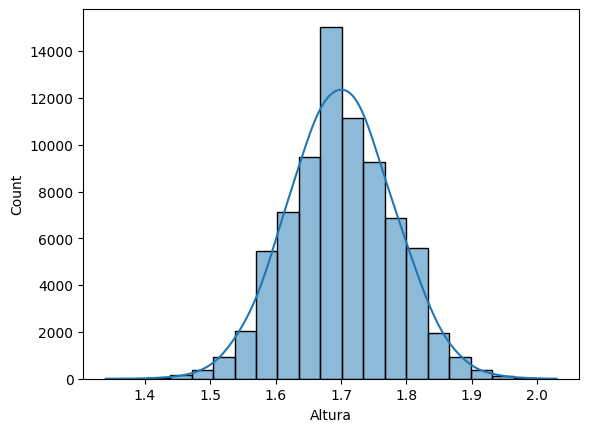

In [298]:
sns.histplot(bins=21, data=dados, x='Altura', kde=True, kde_kws={'bw_adjust':2})
plt.show()

In [299]:
#podemos criar um dicionario
altura_resumo = {
    'media': dados['Altura'].mean(),
    'mediana': dados['Altura'].median(),
    'moda': dados['Altura'].mode()[0]
}
altura_resumo


{'media': np.float64(1.6995084591358667),
 'mediana': 1.7,
 'moda': np.float64(1.7)}

> #### Conclusões

Escreva suas conclusões aqui...

##### **Idade**

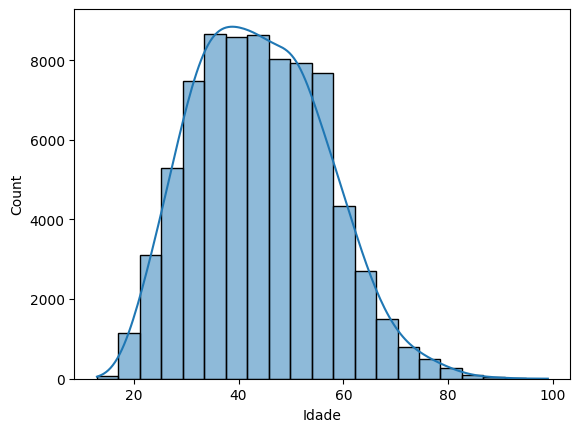

In [300]:
sns.histplot(bins=21, data=dados, x='Idade', kde=True, kde_kws={'bw_adjust':2})
plt.show()

In [301]:
#podemos criar um dicionario
idade_resumo = {
    'media': dados['Idade'].mean(),
    'mediana': dados['Idade'].median(),
    'moda': dados['Idade'].mode()[0]
}
idade_resumo


{'media': np.float64(44.07142113482561), 'mediana': 43.0, 'moda': np.int64(40)}

> #### Conclusões

Conclusão – Altura

*	A distribuição apresenta formato aproximadamente normal.

*	Média, mediana e moda possuem valores muito próximos.

*	Isso indica simetria e baixa presença de outliers.

⸻

Conclusão – Idade

* A distribuição apresenta leve assimetria à direita.

* A cauda indica presença de idades mais altas.

* A média tende a ser levemente superior à mediana devido à assimetria.

## **Aula 04 - Investigando os dados dos colaboradores**

### **Mão na Massa - Analisando as rendas e suas divisões**

Nesta etapa do treinamento, vamos analisar os dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, por meio das medidas separatrizes. Responda às perguntas abaixo e reflita sobre os achados.


#### **Calcule o número de classes para `Renda` até R$15.000 utilizando a regra de Sturges**

$$k = 1 + \frac {10}{3}\log_{10}n$$

onde,

$k$ = número de classes

$n$ = número de observações.


In [302]:
renda_15k = dados[dados['Renda'] <= 15000]
renda_15k.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Categ.Sexo,Cat.Sexo,Categ.Cor,Categ.Anos.Estudo
0,Rondônia,0,23,8,12,800,1.60,0,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,1,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,1,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,0,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,1,Feminino,Parda,8 anos


In [303]:
n = len(renda_15k)
n

76219

In [304]:
import math
k = 1 + (10/3) * math.log10(n)
k

17.273544154972114

In [305]:
k = int(k)
k

17

Obs. Precisamos de 17 classes para criar o histograma

#### **Crie o histograma da `Renda` das pessoas responsáveis até R$15.000 seguindo o número de classes calculado anteriormente**

> **Observação:** Ao rodar o código para dividir os dados em faixas é possível que você observe o limite inferior da 1ª faixa com um valor negativo. Isto porque a *Regra de Sturges* define o intervalo mínimo da 1ª classe pela seguinte fórmula: $min(Renda) - (max(Renda) - min(Renda)) * 0.001$.



In [306]:
faixas = renda_15k.copy()

faixas['faixa_rendas'] = pd.cut(faixas['Renda'], bins=int(k), include_lowest=True)
faixas.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Categ.Sexo,Cat.Sexo,Categ.Cor,Categ.Anos.Estudo,faixa_rendas
0,Rondônia,0,23,8,12,800,1.60,0,Masculino,Parda,11 anos,"(-15.001, 882.353]"
1,Rondônia,1,23,2,12,1150,1.74,1,Feminino,Branca,11 anos,"(882.353, 1764.706]"
2,Rondônia,1,35,8,15,880,1.76,1,Feminino,Parda,14 anos,"(-15.001, 882.353]"
3,Rondônia,0,46,2,6,3500,1.78,0,Masculino,Branca,5 anos,"(2647.059, 3529.412]"
4,Rondônia,1,47,8,9,150,1.69,1,Feminino,Parda,8 anos,"(-15.001, 882.353]"


In [307]:
tabela_frequencias = faixas.groupby('faixa_rendas', observed=False ).size().reset_index(name='frequencia')

# Calculando a porcentagem
tabela_frequencias['porcentagem'] = (tabela_frequencias['frequencia'] / len(faixas)) * 100

tabela_frequencias

,faixa_rendas,frequencia,porcentagem
0,"(-15.001, 882.353]",26311,34.520264
1,"(882.353, 1764.706]",25816,33.870820
2,"(1764.706, 2647.059]",10905,14.307456
3,"(2647.059, 3529.412]",4854,6.368491
4,"(3529.412, 4411.765]",2133,2.798515
5,"(4411.765, 5294.118]",2180,2.860179
6,"(5294.118, 6176.471]",1002,1.314633
7,"(6176.471, 7058.824]",672,0.881670
8,"(7058.824, 7941.176]",208,0.272898
9,"(7941.176, 8823.529]",554,0.726853


> #### Conclusões

colaboradores por faixas de renda. Observa-se uma forte concentração nas duas primeiras faixas salariais, que juntas representam aproximadamente 68,4% do total de colaboradores.

Isso indica que a maioria dos funcionários está concentrada nos menores níveis de remuneração.

À medida que os intervalos salariais aumentam, nota-se uma queda progressiva na frequência, caracterizando uma distribuição assimétrica à direita, com poucos colaboradores nas faixas mais elevadas de renda.

A coluna de porcentagem permite visualizar a participação relativa de cada faixa no total, facilitando a análise da concentração salarial e possíveis desigualdades na estrutura de remuneração.

#### **Responda as seguintes questões sobre o nosso dataset completo utilizando os conceitos que estudamos até aqui:**

##### **1. Qual o percentual de pessoas responsáveis que ganhava até um salário mínimo em 2015 (R$ 788,00)?**



In [308]:
percentual = (dados['Renda'] <= 788).sum() / len(dados) * 100
percentual

np.float64(28.86777719937533)

##### **2. Qual a renda máxima de 95% das pessoas responsáveis na pesquisa?**


In [309]:
#x maiores 100-x
dados['Renda'].quantile(0.95)

np.float64(6000.0)

##### **3.   Qual a renda mínima dos 1% mais bem pagos da pesquisa?**

In [310]:
#x menores x
dados['Renda'].quantile(0.99)

np.float64(15000.0)

##### **4. Qual a renda máxima de 25%, 50% e 75% das pessoas responsáveis que receberam até R$ 6.000 de rendimento mensal? Construa o boxplot e traga o resumo desses dados.**


In [311]:
#Primeiro filtrar quem recebeu até 6k
renda_6k = dados[dados['Renda'] <= 6000]
renda_6k

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Categ.Sexo,Cat.Sexo,Categ.Cor,Categ.Anos.Estudo
0,Rondônia,0,23,8,12,800,1.60,0,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,1,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,1,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,0,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,1,Feminino,Parda,8 anos
...,...,...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,1,Feminino,Branca,10 anos
76836,Distrito Federal,0,30,4,7,1500,1.79,0,Masculino,Preta,6 anos
76837,Distrito Federal,0,32,8,12,1300,1.83,0,Masculino,Parda,11 anos
76838,Distrito Federal,0,57,8,4,1500,1.73,0,Masculino,Parda,3 anos


In [312]:
quartis = renda_6k['Renda'].quantile([0.25, 0.50, 0.75])
quartis

,Renda
0.25,788.0
0.50,1200.0
0.75,2000.0


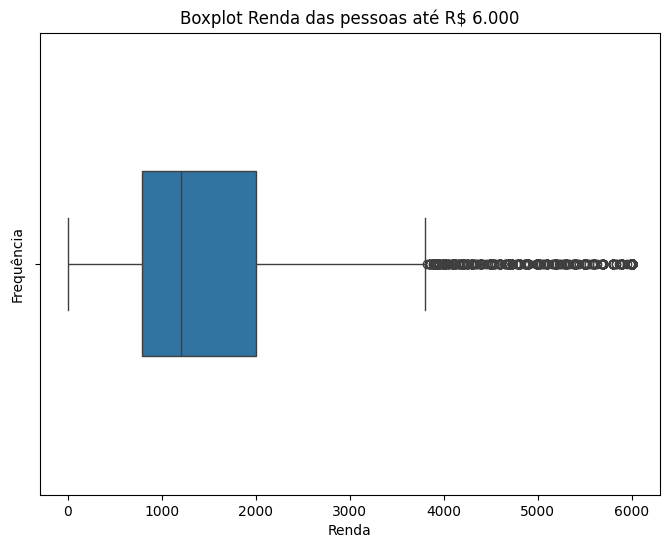

In [313]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=renda_6k['Renda'])
plt.title('Boxplot Renda das pessoas até R$ 6.000')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.ylim(-1, 1)
plt.show()

> #### Conclusões

Considerando apenas os indivíduos com renda de até R$ 6.000, observa-se que 25% recebem até aproximadamente R$ X, enquanto 50% recebem até cerca de R$ Y (mediana). Já 75% possuem rendimento máximo de aproximadamente R$ Z. A análise do boxplot indica uma distribuição assimétrica à direita, sugerindo concentração nos níveis mais baixos de renda, com uma cauda representando indivíduos mais próximos do limite de R$ 6.000.

#### **Construa o boxplot da `Renda` até o percentil 95% (`renda_6k`) das pessoas responsáveis por `Cat.Sexo` e `Cat.Cor`. Interprete o resultado.**

**Dica:** Para incluir uma 3ª variável na construção de um boxplot, utilize o parâmetro `hue` da seguinte maneira: `(x = Renda, y = Cat.Cor, hue = Cat.Sexo)`.

In [314]:
renda_6k.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos.de.Estudo', 'Renda', 'Altura',
       'Categ.Sexo', 'Cat.Sexo', 'Categ.Cor', 'Categ.Anos.Estudo'],
      dtype='object')

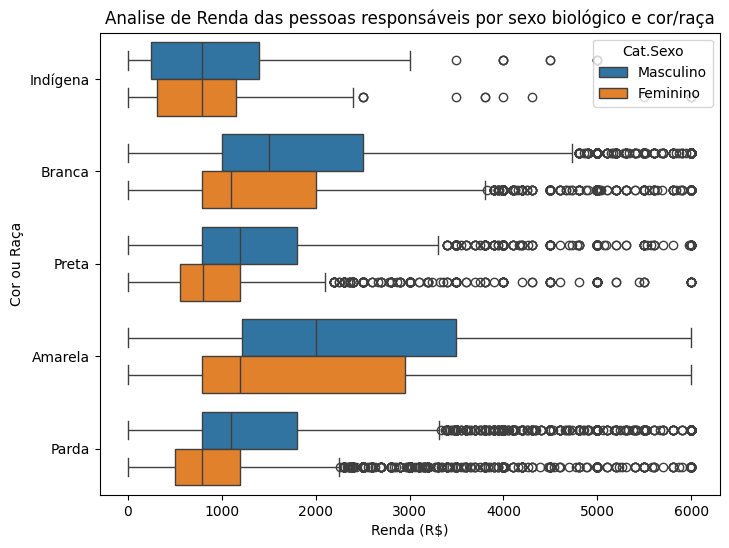

In [316]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Renda', y='Categ.Cor', data=renda_6k, hue='Cat.Sexo')

plt.title('Analise de Renda das pessoas responsáveis por sexo biológico e cor/raça')
plt.xlabel('Renda (R$)')
plt.ylabel('Cor ou Raça')

plt.show()

#### **Qual a idade limite para 20% da população? Construa o histograma acumulado com curva de densidade, definindo a idade limite e quantas pessoas se encaixam nessa porcentagem.**

**Dica:** Para ler os últimos valores de um DataFrame utilize a função `tail()`.

Exemplo: `df.tail(3)` lê os ultimos 3 registros do DataFrame `df`.

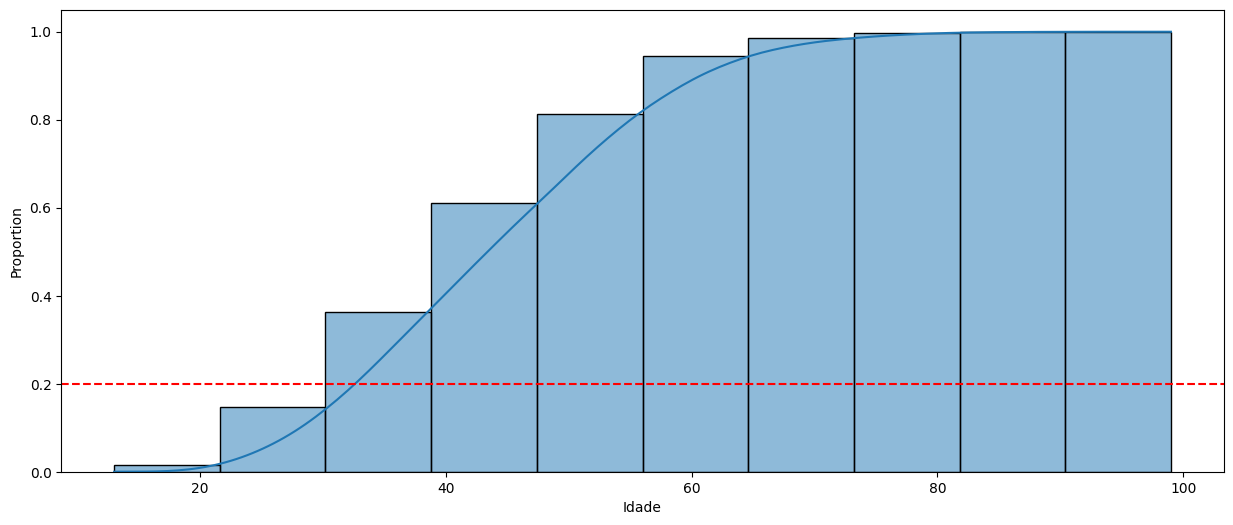

In [317]:
plt.figure(figsize=(15, 6))
sns.histplot(data=dados, x='Idade', bins= 10, cumulative=True, stat='proportion', kde=True )
plt.axhline(0.20, color='red', linestyle='dashed')

plt.show()

In [318]:
idades_classificacao = dados.copy()

In [319]:
# 1. Ordenar os dados pela coluna 'idade'
idades_classificacao = idades_classificacao.sort_values(by='Idade')

# 2. Adicionar a coluna 'cumulativo' (posição relativa de cada linha)
idades_classificacao['cumulativo'] = (idades_classificacao.reset_index().index + 1) / len(idades_classificacao)

# 3. Adicionar a coluna 'qualificado' com base no valor de 'cumulativo'
idades_classificacao['qualificado'] = idades_classificacao['cumulativo'] <= 0.20

# Exibindo o resultado
idades_classificacao.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Categ.Sexo,Cat.Sexo,Categ.Cor,Categ.Anos.Estudo,cumulativo,qualificado
2798,Amazonas,0,13,8,6,100,1.61,0,Masculino,Parda,5 anos,0.000013,True
40579,Espírito Santo,0,14,8,4,300,1.65,0,Masculino,Parda,3 anos,0.000026,True
13158,Maranhão,1,15,4,9,200,1.53,1,Feminino,Preta,8 anos,0.000039,True
1426,Rondônia,0,15,4,6,400,1.64,0,Masculino,Preta,5 anos,0.000052,True
35197,Minas Gerais,1,15,8,3,0,1.81,1,Feminino,Parda,2 anos,0.000065,True


In [320]:
idades_classificacao.tail(3)

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Categ.Sexo,Cat.Sexo,Categ.Cor,Categ.Anos.Estudo,cumulativo,qualificado
1789,Acre,0,95,8,9,500,1.86,0,Masculino,Parda,8 anos,0.999974,False
11834,Maranhão,0,97,0,1,0,1.76,0,Masculino,Indígena,Sem instrução e menos de 1 ano,0.999987,False
74079,Goiás,0,99,4,1,0,1.65,0,Masculino,Preta,Sem instrução e menos de 1 ano,1.000000,False


In [321]:
idades_qualificados = idades_classificacao[idades_classificacao['qualificado'] == True]
idades_qualificados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Categ.Sexo,Cat.Sexo,Categ.Cor,Categ.Anos.Estudo,cumulativo,qualificado
2798,Amazonas,0,13,8,6,100,1.61,0,Masculino,Parda,5 anos,0.000013,True
40579,Espírito Santo,0,14,8,4,300,1.65,0,Masculino,Parda,3 anos,0.000026,True
13158,Maranhão,1,15,4,9,200,1.53,1,Feminino,Preta,8 anos,0.000039,True
1426,Rondônia,0,15,4,6,400,1.64,0,Masculino,Preta,5 anos,0.000052,True
35197,Minas Gerais,1,15,8,3,0,1.81,1,Feminino,Parda,2 anos,0.000065,True


In [322]:
len(idades_qualificados)

15368

In [323]:
idades_qualificados['Idade'].max()

33

> #### Conclusões

A análise da distribuição acumulada das idades indica que a idade limite para os 20% mais jovens da população é 33 anos. Isso significa que indivíduos com idade de até 33 anos representam aproximadamente 20% da população analisada.

Ao todo, esse grupo corresponde a **15.368 pessoas.**

O histograma acumulado confirma esse ponto de corte, evidenciando o crescimento progressivo da proporção até atingir 20% da população na faixa etária de 33 anos.

## **Aula 05 - Analisando a variação dos dados**

### **Mão na Massa - Analisando a variação da Renda das pessoas responsáveis**

Nesta última etapa do treinamento, vamos analisar os dados de renda das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, calculando a variação desta para determinadas características da amostra. Responda às perguntas abaixo e reflita sobre os achados.


#### **Responda as seguintes questões sobre o nosso dataset utilizando os conceitos que estudamos até aqui:**

##### **1.   Qual o desvio médio absoluto, a variância e desvio padrão da renda das pessoas responsáveis na pesquisa?**





In [324]:
estat_renda = dados['Renda'].agg(
    media='mean',
    mediana='median',
    mad=lambda x: (abs(x - x.mean())).mean()
).reset_index()

# Exibindo o resultado
round(estat_renda,2)

,index,Renda
0,media,2000.38
1,mediana,1200.00
2,mad,1526.50


##### **2. Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas em relação aos Anos de Estudo. O que podemos interpretar com esses dados?**

In [328]:
dados.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos.de.Estudo', 'Renda', 'Altura',
       'Categ.Sexo', 'Cat.Sexo', 'Categ.Cor', 'Categ.Anos.Estudo'],
      dtype='object')

In [329]:
estat_renda_anos_estudo = dados.groupby('Categ.Anos.Estudo', observed=False)['Renda'].agg(
    media='mean',
    mediana='median',
    desvio_padrao='std'
).reset_index()
estat_renda_anos_estudo

,Categ.Anos.Estudo,media,mediana,desvio_padrao
0,Sem instrução e menos de 1 ano,732.994187,600.0,955.274843
1,1 ano,806.524496,700.0,1203.866292
2,2 anos,842.560209,788.0,1298.873800
3,3 anos,980.044275,788.0,1907.138437
4,4 anos,1150.439293,900.0,1293.144934
5,5 anos,1183.575683,940.0,1328.709017
6,6 anos,1284.082618,1000.0,1326.140204
7,7 anos,1289.166233,1000.0,1279.412081
8,8 anos,1437.744862,1100.0,1404.280340
9,9 anos,1315.685870,1000.0,1888.373952


> #### Conclusões

Os dados indicam uma **relação positiva clara entre escolaridade e renda média.** À medida que os anos de estudo aumentam, observa-se crescimento consistente na média e na mediana da renda.

Indivíduos com menor escolaridade (até 4 anos de estudo) apresentam rendimentos médios abaixo de R$ 1.200, enquanto aqueles com 12 anos ou mais de estudo ultrapassam significativamente esse valor. O grupo com **15 anos ou mais **apresenta a maior média salarial (R$ 5.242,44), evidenciando o forte impacto da escolaridade na renda.

Além disso, nota-se que o **desvio padrão aumenta nos níveis mais altos de escolaridade**, especialmente no grupo de 15 anos ou mais (R$ 6.450,49). Isso indica maior dispersão salarial, sugerindo que, quanto maior a qualificação, maior também a possibilidade de rendimentos muito elevados, mas também maior heterogeneidade dentro do grupo.

Outro ponto relevante é que, em praticamente todos os níveis de escolaridade, a média é superior à mediana, o que sugere uma distribuição assimétrica à direita da renda, com influência de valores elevados que puxam a média para cima.

##### **3.   Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas do sexo biológico masculino e feminino até R$ 15.000. O que podemos interpretar com esses dados?**

In [326]:
estat_renda_sexo = dados[dados['Renda'] <= 15000].groupby('Cat.Sexo')['Renda'].agg(
    media='mean',
    mediana='median',
    desvio_padrao='std'
).reset_index()
estat_renda_sexo

/tmp/ipython-input-118285372.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estat_renda_sexo = dados[dados['Renda'] <= 15000].groupby('Cat.Sexo')['Renda'].agg(


,Cat.Sexo,media,mediana,desvio_padrao
0,Masculino,1964.351997,1300.0,2101.163468
1,Feminino,1460.143630,900.0,1763.686374


> #### Conclusões

Até R$ 15.000, homens apresentam média e mediana de renda superiores às das mulheres. O desvio padrão também é maior entre os homens, indicando maior dispersão salarial. Em ambos os casos, a média é maior que a mediana, sugerindo assimetria à direita na distribuição de renda.

#### **Construa um boxplot da `Renda` dos estados da Região Centro-Oeste até R$ 10.000 segundo o `Cat.Sexo`. Para interpretar o resultado construa 3 tabelas com cada uma das estatísticas descritivas (média, mediana e desvio padrão).**

In [331]:
dados_sudeste = renda_10k_centro_oeste = dados[dados['UF'].isin(['Goiás', 'Distrito Federal', 'Mato Grosso', 'Mato Grosso do Sul', 'Tocantins']) & (dados['Renda'] <=10e3)]
dados_sudeste

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Categ.Sexo,Cat.Sexo,Categ.Cor,Categ.Anos.Estudo
10181,Tocantins,0,34,2,5,1300,1.68,0,Masculino,Branca,4 anos
10182,Tocantins,0,41,8,8,2000,1.65,0,Masculino,Parda,7 anos
10183,Tocantins,0,36,8,12,900,1.54,0,Masculino,Parda,11 anos
10184,Tocantins,1,51,8,2,800,1.84,1,Feminino,Parda,1 ano
10185,Tocantins,1,39,8,16,788,1.74,1,Feminino,Parda,15 anos ou mais
...,...,...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,1,Feminino,Branca,10 anos
76836,Distrito Federal,0,30,4,7,1500,1.79,0,Masculino,Preta,6 anos
76837,Distrito Federal,0,32,8,12,1300,1.83,0,Masculino,Parda,11 anos
76838,Distrito Federal,0,57,8,4,1500,1.73,0,Masculino,Parda,3 anos


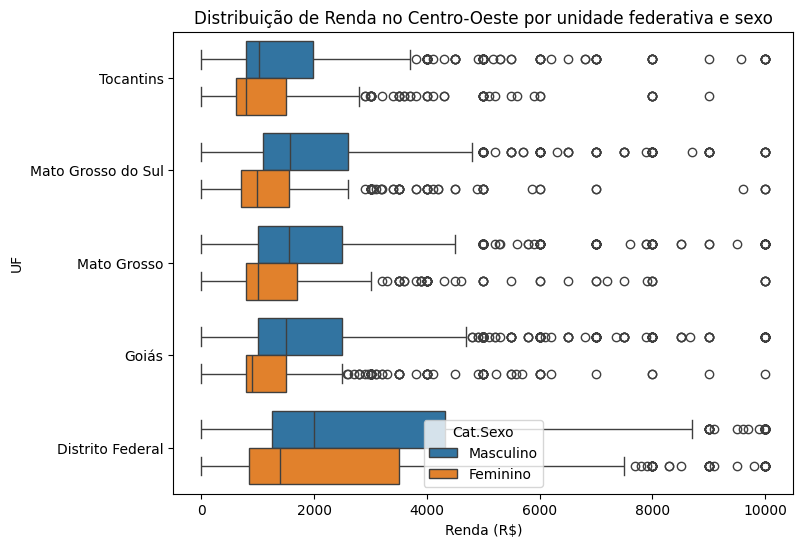

In [332]:
# Criando o boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Renda', y='UF', data=renda_10k_centro_oeste, hue='Cat.Sexo')

# Adicionando título e rótulos aos eixos
plt.title('Distribuição de Renda no Centro-Oeste por unidade federativa e sexo')
plt.xlabel('Renda (R$)')
plt.ylabel('UF')

# Exibindo o gráfico
plt.show()

##### **Média**

In [333]:
renda_10k_centro_oeste_media = round(pd.crosstab(renda_10k_centro_oeste['Cat.Sexo'], renda_10k_centro_oeste['UF'], values=renda_10k_centro_oeste['Renda'], aggfunc='mean'), 2)

renda_10k_centro_oeste_media

UF,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul,Tocantins
Cat.Sexo,,,,,
Masculino,3138.46,2030.06,2092.10,2181.73,1598.92
Feminino,2551.87,1284.65,1548.93,1396.69,1381.80


##### **Mediana**

In [334]:
renda_10k_centro_oeste_mediana = round(pd.crosstab(renda_10k_centro_oeste['Cat.Sexo'], renda_10k_centro_oeste['UF'], values=renda_10k_centro_oeste['Renda'], aggfunc='median'), 2)

renda_10k_centro_oeste_mediana

UF,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul,Tocantins
Cat.Sexo,,,,,
Masculino,2000.0,1500.0,1560.0,1576.0,1020.0
Feminino,1400.0,900.0,1000.0,986.0,788.0


##### **Desvio Padrão**

In [335]:
renda_10k_centro_oeste_sd = round(pd.crosstab(renda_10k_centro_oeste['Cat.Sexo'], renda_10k_centro_oeste['UF'], values=renda_10k_centro_oeste['Renda'], aggfunc='std'), 2)

renda_10k_centro_oeste_sd

UF,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul,Tocantins
Cat.Sexo,,,,,
Masculino,2513.43,1587.38,1707.91,1773.44,1632.05
Feminino,2451.17,1110.00,1508.59,1400.90,1516.37


> #### Conclusões

No Centro Oeste até R$ 10.000, o Distrito Federal apresenta as maiores médias e medianas de renda para ambos os sexos. Em todos os estados, homens possuem renda média e mediana superiores às das mulheres. O desvio padrão é mais elevado no Distrito Federal, indicando maior dispersão salarial, especialmente entre os homens. De modo geral, observa se diferença consistente de renda entre os sexos na região analisada.